In [46]:
#218017444, Nkumane TA

In [47]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [48]:
#       import the libraries
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

#import layers from keras
from keras.layers import Dense, InputLayer
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [49]:
#   unzip contents of the drive
!unzip /content/drive/MyDrive/deeplearning_assignment_2/train_nLPp5K8.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/5250.jpg         
  inflating: images/5251.jpg         
  inflating: images/5252.jpg         
  inflating: images/5253.jpg         
  inflating: images/5254.jpg         
  inflating: images/5255.jpg         
  inflating: images/5256.jpg         
  inflating: images/5257.jpg         
  inflating: images/5258.jpg         
  inflating: images/5259.jpg         
  inflating: images/5260.jpg         
  inflating: images/5261.jpg         
  inflating: images/5262.jpg         
  inflating: images/5263.jpg         
  inflating: images/5264.jpg         
  inflating: images/5265.jpg         
  inflating: images/5266.jpg         
  inflating: images/5267.jpg         
  inflating: images/5268.jpg         
  inflating: images/5269.jpg         
  inflating: images/5270.jpg         
  inflating: images/5271.jpg         
  inflating: images/5272.jpg         
  inflating: images/5273.jpg         
  inflating: images/5274.jpg         

In [50]:
#   load the data
image_data = pd.read_csv('/content/drive/MyDrive/deeplearning_assignment_2/train.csv', nrows = 2000)

In [51]:
image_data.shape

(2000, 2)

In [52]:
image_data.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [53]:
#   create random number generation, to keep the same pattern of randomization
seed = 42
range = np.random.RandomState(seed)

In [54]:
image_data.head()

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1


In [55]:
#   Load images and store them in numpy array

In [56]:
x = []  # list to store the images
for img_name in image_data.image_names:
  img = plt.imread('/content/images/'+img_name)
  x.append(img)

In [57]:
# dependant variable
y = image_data['class'].values   #target second column of csv file

In [58]:
#   convert list to array
x = np.array(x)

In [59]:
x.shape

(2000, 224, 224, 3)

In [60]:
#   from the shape of the independant values, i can deduce that the images are 3D

# PRE-PROCESSING THE DATA

In [61]:
#   convert the 3d image to 1d image
x = x.reshape(x.shape[0], 224*224*3)

In [62]:
x.shape

(2000, 150528)

In [63]:
#   the images are now 1 dimensional

In [64]:
# minimum and maximum of pixel values of the images
x.min(), x.max()

(0, 255)

In [65]:
x=x.astype('float32')

In [66]:
#   normalizing the pixel values of images [converting to the 0 and 1]
x = x/x.max()

In [67]:
x.min(), x.max()

(0.0, 1.0)

#    CREATE TRAINING AND VALIDATION DATA SET

In [68]:
x_train, x_valid, y_train, y_valid = train_test_split(x,y, test_size = 0.4, random_state = seed)

#    DEFINE THE MODEL ARCHITECTURE

In [69]:
model = Sequential()
model.add(InputLayer(input_shape = (224*224*3)))
model.add(Dense(100, activation = 'sigmoid'))  #hidden layer has 100 neurons
model.add(Dense(100, activation = 'sigmoid'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 100)               15052900  
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


#      COMPILING THE MODEL

In [71]:
# defining the optimizer and setting the learning rate at 10^-5
adam = Adam(lr = 1e-5)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [72]:
#   compiling the model

# define loss as binary_crossentrophy
# define optimizer as Adam
# define metrics as accuracy

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#    SETTING UP EARLY STOPPING

In [73]:
#   import modules for early stoppping
#       Early Stopping monitors the performance of the model for every epoch on a held-out validation 
#       set during the training, and terminate the training conditional on the validation performance
#       mode = minimum, due to loss

from keras.callbacks import EarlyStopping

In [74]:
#   val_loss = error
#   min_delta = minimum error interval  before process is stopped
#   pantience = by the time of error interval (0.01) occurs 5 consecutive times, the early stopping rule will invoke [terminate iteration]
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0.01, patience = 5, mode = 'min')

#      TRAIN MODEL USING EARLY STOPPING

In [75]:
#   training model for 25 epoches

model_history = model.fit(x_train, y_train, epochs = 25, batch_size = 128, validation_data = (x_valid, y_valid))

Epoch 1/25
10/10 [==============================] - 9s 757ms/step - loss: 0.7089 - accuracy: 0.5225 - val_loss: 0.6944 - val_accuracy: 0.4938
Epoch 2/25
10/10 [==============================] - 7s 691ms/step - loss: 0.7003 - accuracy: 0.4758 - val_loss: 0.6970 - val_accuracy: 0.5063
Epoch 3/25
10/10 [==============================] - 7s 658ms/step - loss: 0.6950 - accuracy: 0.5192 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 4/25
10/10 [==============================] - 4s 372ms/step - loss: 0.6928 - accuracy: 0.5192 - val_loss: 0.6944 - val_accuracy: 0.5063
Epoch 5/25
10/10 [==============================] - 4s 370ms/step - loss: 0.6930 - accuracy: 0.5192 - val_loss: 0.6937 - val_accuracy: 0.5063
Epoch 6/25
10/10 [==============================] - 4s 373ms/step - loss: 0.6936 - accuracy: 0.5192 - val_loss: 0.6946 - val_accuracy: 0.5063
Epoch 7/25
10/10 [==============================] - 5s 534ms/step - loss: 0.6927 - accuracy: 0.5192 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 

#    EVALUATE MODEL PERFOMANCE

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
# accuracy on validation set
predict_x = model.predict(x_valid)
classes_x = np.argmax(predict_x, axis = 1)

In [78]:
clf = RandomForestRegressor(n_estimators = 10)

In [79]:
#       print the graphs

<function matplotlib.pyplot.show(*args, **kw)>

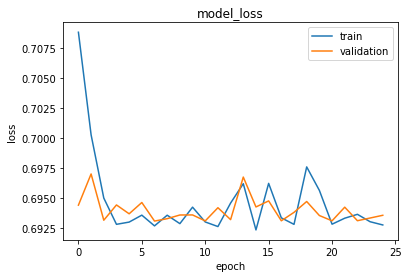

In [80]:
#   loss graph
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

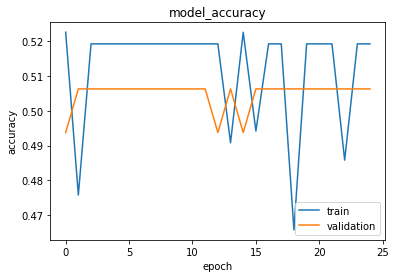

In [81]:
#     accuracy graph
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'lower right')
plt.show

In [82]:
#       PRINT PROBABILITYAND ACTUAL CLASS

In [83]:
# pull out the original images from the data which correspond to the validation data
_, gender , _, valid_y = train_test_split(image_data.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly
index = range.choice(len(gender))

# get the corresponding image name and probability
img_name = gender[index]
prob = (predict_x * 100).astype(int)[index] # used to determine probabulity of males to females/females to males
# read the image
img = plt.imread('images/' + img_name)

###    PRINT PROBABIILITY

Gender is: [52] % male
Gender is:  [48] % female 
And actual class is  0


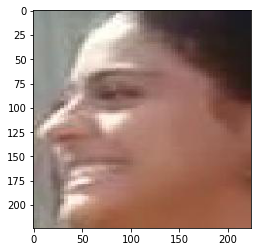

In [84]:
# print probability and actual class
print('Gender is:', prob,  '% male')
print('Gender is: ',100-prob, '% female ')
print('And actual class is ', valid_y[index])

# plot image
plt.imshow(img)

#      HYPERPARAMETER TUNING OF NEURAL NETWORK

In [85]:
#     Change activation function of hidden layer

In [118]:
# using relu as activation function in hidden layer
model=Sequential()
model.add(InputLayer(input_shape=(x_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [119]:
# summary of the model
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 100)               15052900  
                                                                 
 dense_24 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [120]:
# training the model for 25 epochs
model_history = model.fit(x_train, y_train, epochs=25, batch_size=128,validation_data=(x_valid,y_valid))

Epoch 1/25
10/10 [==============================] - 4s 386ms/step - loss: 2.6968 - accuracy: 0.5008 - val_loss: 2.8384 - val_accuracy: 0.5063
Epoch 2/25
10/10 [==============================] - 4s 372ms/step - loss: 2.6653 - accuracy: 0.5192 - val_loss: 2.5975 - val_accuracy: 0.5063
Epoch 3/25
10/10 [==============================] - 4s 364ms/step - loss: 2.4267 - accuracy: 0.5192 - val_loss: 2.3537 - val_accuracy: 0.5063
Epoch 4/25
10/10 [==============================] - 4s 369ms/step - loss: 2.1949 - accuracy: 0.5192 - val_loss: 2.1113 - val_accuracy: 0.5063
Epoch 5/25
10/10 [==============================] - 4s 364ms/step - loss: 1.9612 - accuracy: 0.5192 - val_loss: 1.8750 - val_accuracy: 0.5063
Epoch 6/25
10/10 [==============================] - 4s 368ms/step - loss: 1.7341 - accuracy: 0.5192 - val_loss: 1.6478 - val_accuracy: 0.5063
Epoch 7/25
10/10 [==============================] - 4s 372ms/step - loss: 1.5190 - accuracy: 0.5192 - val_loss: 1.4326 - val_accuracy: 0.5063
Epoch 

Loss starts high in lower epoches and decreases when approaching higher epoches, 
Accuracy is low and constant in lower epocher, and later switches to a higher constant value at higher epoches

##    VISUALIZING ACCURACY OF THRE MODEL

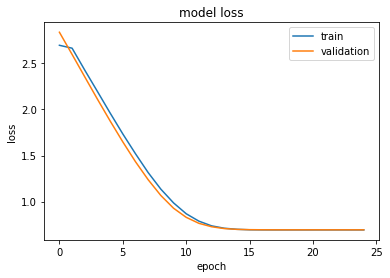

In [121]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Increase hidden nerouns

In [95]:
# increase hidden neurons
model=Sequential()
model.add(InputLayer(input_shape=(x_train.shape[1],)))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

# compiling the model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [96]:
# model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1024)              154141696 
                                                                 
 dense_15 (Dense)            (None, 1)                 1025      
                                                                 
Total params: 154,142,721
Trainable params: 154,142,721
Non-trainable params: 0
_________________________________________________________________


In [97]:
model_history = model.fit(x_train, y_train, epochs=25, batch_size=128,validation_data=(x_valid,y_valid))

Epoch 1/25
10/10 [==============================] - 25s 2s/step - loss: 7.5964 - accuracy: 0.4942 - val_loss: 7.1143 - val_accuracy: 0.4938
Epoch 2/25
10/10 [==============================] - 22s 2s/step - loss: 6.2664 - accuracy: 0.4808 - val_loss: 4.7402 - val_accuracy: 0.4938
Epoch 3/25
10/10 [==============================] - 22s 2s/step - loss: 3.8445 - accuracy: 0.4808 - val_loss: 2.3364 - val_accuracy: 0.4938
Epoch 4/25
10/10 [==============================] - 24s 2s/step - loss: 1.4902 - accuracy: 0.4808 - val_loss: 0.6942 - val_accuracy: 0.4938
Epoch 5/25
10/10 [==============================] - 22s 2s/step - loss: 0.8312 - accuracy: 0.5142 - val_loss: 0.9889 - val_accuracy: 0.5063
Epoch 6/25
10/10 [==============================] - 24s 2s/step - loss: 0.8596 - accuracy: 0.5192 - val_loss: 0.7035 - val_accuracy: 0.5063
Epoch 7/25
10/10 [==============================] - 22s 2s/step - loss: 0.7118 - accuracy: 0.4775 - val_loss: 0.7187 - val_accuracy: 0.4938
Epoch 8/25
10/10 [==

the accuracy and loss flactuates between low and high in the lower epoches, but later stays constant at higher epoches

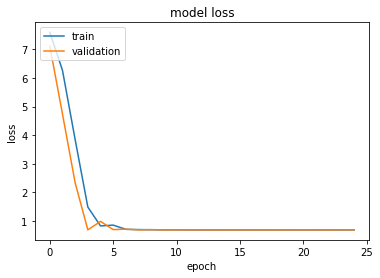

In [98]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Increase hidden layers

In [123]:
# increase hidden layers
model=Sequential()
model.add(InputLayer(input_shape=(x_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [124]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [125]:
# model summary
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 100)               15052900  
                                                                 
 dense_26 (Dense)            (None, 100)               10100     
                                                                 
 dense_27 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


In [126]:
model_history = model.fit(x_train, y_train, epochs=25, batch_size=128,validation_data=(x_valid,y_valid))

Epoch 1/25
10/10 [==============================] - 5s 395ms/step - loss: 0.7225 - accuracy: 0.4825 - val_loss: 0.7054 - val_accuracy: 0.5063
Epoch 2/25
10/10 [==============================] - 4s 360ms/step - loss: 0.7005 - accuracy: 0.5192 - val_loss: 0.6932 - val_accuracy: 0.5063
Epoch 3/25
10/10 [==============================] - 4s 363ms/step - loss: 0.6948 - accuracy: 0.4875 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 4/25
10/10 [==============================] - 4s 362ms/step - loss: 0.6929 - accuracy: 0.5192 - val_loss: 0.6949 - val_accuracy: 0.5063
Epoch 5/25
10/10 [==============================] - 4s 362ms/step - loss: 0.6935 - accuracy: 0.5192 - val_loss: 0.6931 - val_accuracy: 0.5063
Epoch 6/25
10/10 [==============================] - 4s 368ms/step - loss: 0.6946 - accuracy: 0.5192 - val_loss: 0.6935 - val_accuracy: 0.5063
Epoch 7/25
10/10 [==============================] - 4s 362ms/step - loss: 0.6930 - accuracy: 0.5192 - val_loss: 0.6944 - val_accuracy: 0.5063
Epoch 

The loss of the model start high for the first low epoches, and remains constant for the remainder of the epoches. The accuracy remains flactuating between high and lower values

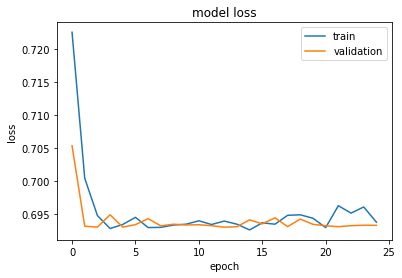

In [127]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Increasing number of epochs

In [106]:
# increase number of epochs
model=Sequential()
model.add(InputLayer(input_shape=(x_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [107]:
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [108]:
# model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 100)               15052900  
                                                                 
 dense_20 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [110]:
model_history = model.fit(x_train, y_train, epochs=50, batch_size=128,validation_data=(x_valid,y_valid))

Epoch 1/50
10/10 [==============================] - 4s 389ms/step - loss: 0.6925 - accuracy: 0.5192 - val_loss: 0.6934 - val_accuracy: 0.5063
Epoch 2/50
10/10 [==============================] - 4s 367ms/step - loss: 0.6928 - accuracy: 0.5192 - val_loss: 0.6938 - val_accuracy: 0.5063
Epoch 3/50
10/10 [==============================] - 4s 370ms/step - loss: 0.6926 - accuracy: 0.5192 - val_loss: 0.6938 - val_accuracy: 0.5063
Epoch 4/50
10/10 [==============================] - 4s 368ms/step - loss: 0.6925 - accuracy: 0.5192 - val_loss: 0.6937 - val_accuracy: 0.5063
Epoch 5/50
10/10 [==============================] - 4s 366ms/step - loss: 0.6925 - accuracy: 0.5192 - val_loss: 0.6935 - val_accuracy: 0.5063
Epoch 6/50
10/10 [==============================] - 4s 366ms/step - loss: 0.6925 - accuracy: 0.5192 - val_loss: 0.6933 - val_accuracy: 0.5063
Epoch 7/50
10/10 [==============================] - 4s 363ms/step - loss: 0.6925 - accuracy: 0.5192 - val_loss: 0.6935 - val_accuracy: 0.5063
Epoch 

The accuracy is always constant, theres a slight dfference in the loss values
 

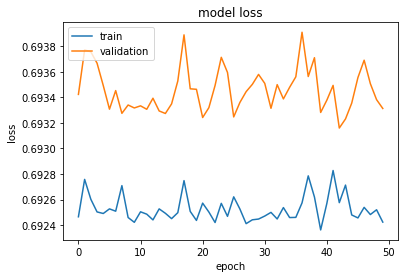

In [111]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Changing the optimizer

In [112]:
# change the optimizer
model=Sequential()
model.add(InputLayer(input_shape=(x_train.shape[1],)))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

In [113]:
#  optimizer as sgd
model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [114]:
# model summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 100)               15052900  
                                                                 
 dense_22 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [116]:
model_history = model.fit(x_train, y_train, epochs=25, batch_size=128,validation_data=(x_valid,y_valid))

Epoch 1/25
10/10 [==============================] - 3s 335ms/step - loss: 0.6805 - accuracy: 0.5233 - val_loss: 0.6778 - val_accuracy: 0.5138
Epoch 2/25
10/10 [==============================] - 3s 331ms/step - loss: 0.6437 - accuracy: 0.6400 - val_loss: 0.6501 - val_accuracy: 0.5987
Epoch 3/25
10/10 [==============================] - 3s 328ms/step - loss: 0.6300 - accuracy: 0.6500 - val_loss: 0.6240 - val_accuracy: 0.6837
Epoch 4/25
10/10 [==============================] - 3s 331ms/step - loss: 0.6054 - accuracy: 0.6975 - val_loss: 0.6949 - val_accuracy: 0.5462
Epoch 5/25
10/10 [==============================] - 3s 327ms/step - loss: 0.6368 - accuracy: 0.6408 - val_loss: 0.6043 - val_accuracy: 0.6888
Epoch 6/25
10/10 [==============================] - 3s 329ms/step - loss: 0.5926 - accuracy: 0.6817 - val_loss: 0.6476 - val_accuracy: 0.6050
Epoch 7/25
10/10 [==============================] - 3s 335ms/step - loss: 0.5929 - accuracy: 0.6692 - val_loss: 0.6686 - val_accuracy: 0.5788
Epoch 

 For the sgd optimizer, the loss values remain flactuating, however the accuracy flactuates [fluctuation values are low at lower epocher and increase as higher epoches]

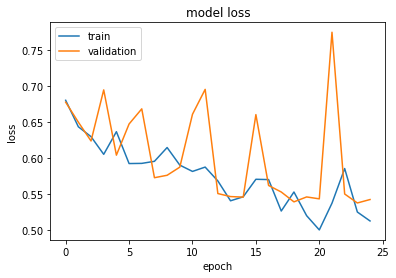

In [117]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()